In this notebook:
- We will generate a synthetic data set
- Add some gaussian noise to the target feature
- Fit diferent regression models to this dataset and evaluate how they perform on the noisy data set. 

## Import necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,
                                mean_squared_error,
                                root_mean_squared_error,
                                max_error)

## Create a data set and add some noise to the target feature

In [2]:
# A synthetic data set with some Gaussian noise
df = pd.DataFrame()

a = np.linspace(0, 1, 10000)
intercept = 0.15
target_without_noise = intercept + a + a**2 + a**5

noise = np.random.normal(0, 0.02, len(a))
target_with_noise = target_without_noise + noise

df["a"] = a
df["a2"] = a**2
df["a3"] = a**3
df["a4"] = a**4
df["a5"] = a**5
df["target_without_noise"] = target_without_noise
df["target_with_noise"] = target_with_noise

In [3]:
df.head()

,a,a2,a3,a4,a5,target_without_noise,target_with_noise
0,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.1500,0.170926
1,0.0001,1.000200e-08,1.000300e-12,1.000400e-16,1.000500e-20,0.1501,0.139133
2,0.0002,4.000800e-08,8.002400e-12,1.600640e-15,3.201600e-19,0.1502,0.154347
3,0.0003,9.001800e-08,2.700810e-11,8.103241e-15,2.431215e-18,0.1503,0.189440
4,0.0004,1.600320e-07,6.401920e-11,2.561024e-14,1.024512e-17,0.1504,0.142576


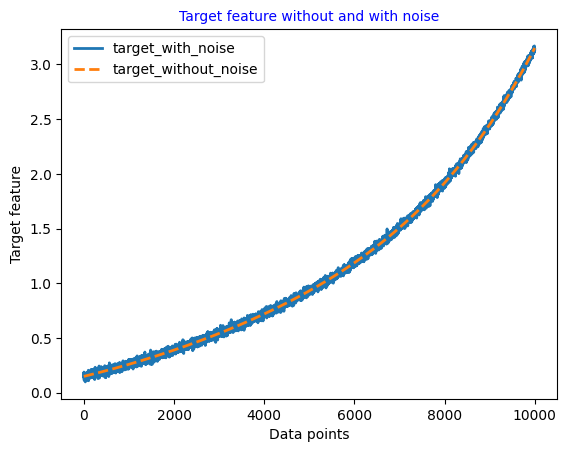

In [4]:
# Plot the target feature without and with noise 
plt.plot(df.target_with_noise, "-", lw=2, label="target_with_noise")
plt.plot(df.target_without_noise, "--", lw=2, label="target_without_noise")
plt.xlabel("Data points")
plt.ylabel("Target feature")
plt.title("Target feature without and with noise", c="blue", fontsize=10)
plt.legend()
plt.show();

## Fit a model using the data set we just created

#### First, we use target feature without noise to fit a `LinearRegression` model

In [5]:
# Split the data in to training and testing set
# Here, we are using the target feature without noise 
X_train_without_noise, X_test_without_noise, \
    y_train_without_noise, y_test_without_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-2]],
                                                    test_size=0.25)

In [6]:
## Fit a model
model = LinearRegression().fit(X_train_without_noise, y_train_without_noise)

In [7]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_without_noise)

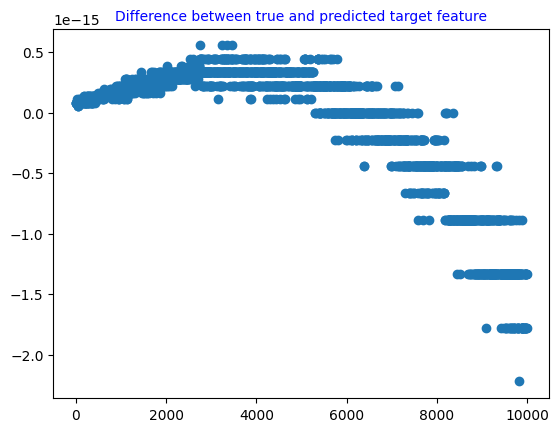

In [8]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_without_noise - y_pred, "o")
plt.title("Difference between true and predicted target feature", c="blue", fontsize=10)
plt.show();

In [9]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_without_noise, y_test_without_noise))
print("Mean absolute error =", mean_absolute_error(y_test_without_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_without_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_without_noise, y_pred))
print("Maximum error =", max_error(y_test_without_noise, y_pred))

Coefficient of determination = 1.0
Mean absolute error = 4.092282068768327e-16
Mean squared error = 3.1934013889719863e-31
Root mean squared error = 5.651018836432937e-16
Maximum error = 2.220446049250313e-15


In [10]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1499999999999999


In [11]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.00000000e+00  1.00000000e+00  1.38777878e-14 -1.24344979e-14
  1.00000000e+00]


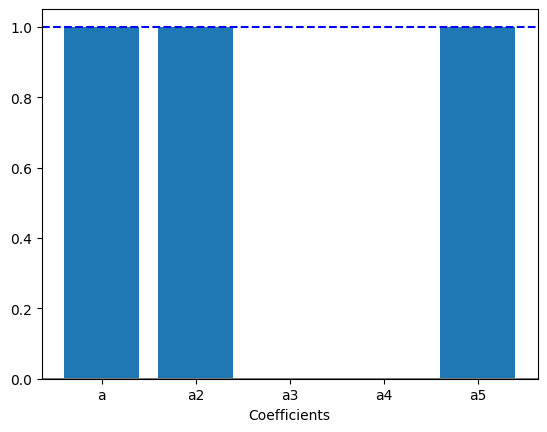

In [12]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.show();

#### Now, we use target feature with noise to fit a `LinearRegression` model

In [13]:
# Split the data in to training and testing set
# Here, we are using the target feature with noise 
X_train_with_noise, X_test_with_noise,\
    y_train_with_noise, y_test_with_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-1]],
                                                    test_size=0.25)

In [14]:
## Fit a model
model = LinearRegression().fit(X_train_with_noise, y_train_with_noise)

In [15]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

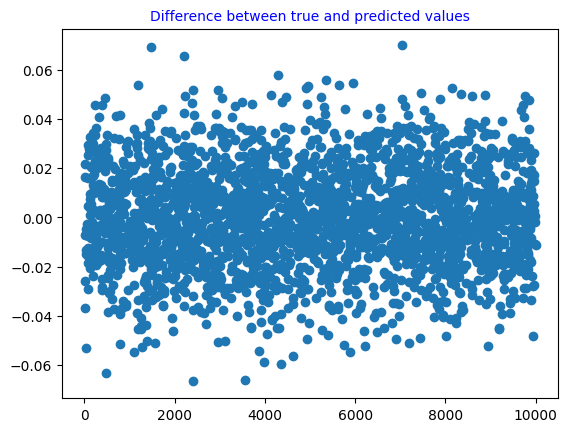

In [16]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [17]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993722016577845
Mean absolute error = 0.016159922506776867
Mean squared error = 0.00040922755703321406
Root mean squared error = 0.020229373619398455
Maximum error = 0.06990350570787895


In [18]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1491334223350882


In [19]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.02778654  0.85391353  0.29189976 -0.25105731  1.07769669]


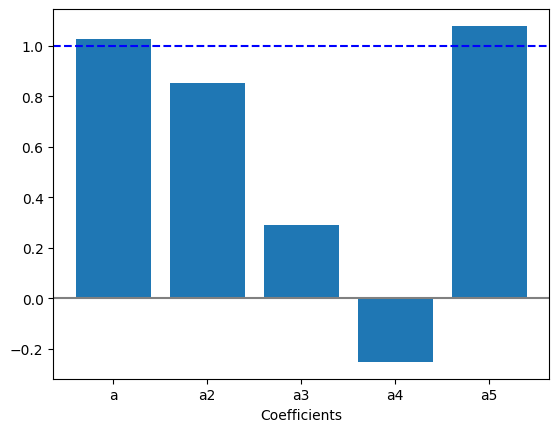

In [20]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.show();

Important points to note:
- When we used `target feature without noise` to train and test our model, the `model performed extremely well` in predicting target feature and the coefficients associated with input features.
- When we used `target feature with noise` to train and test our model, the `model performed really bad` in predicting the coefficients.

## Now, we will explore other regression methods using noisy target feature

#### Lasso

In [21]:
## Fit a model
model = Lasso(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [22]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

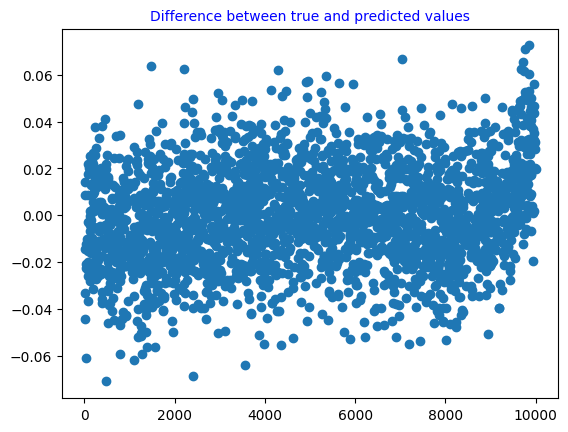

In [23]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [24]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993062701210587
Mean absolute error = 0.016985816454814888
Mean squared error = 0.00045220473599570904
Root mean squared error = 0.021265106065940724
Maximum error = 0.07254626677499632


In [25]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1566717601192571


In [26]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.04133971 0.66350666 0.32347327 0.45280481 0.48055985]


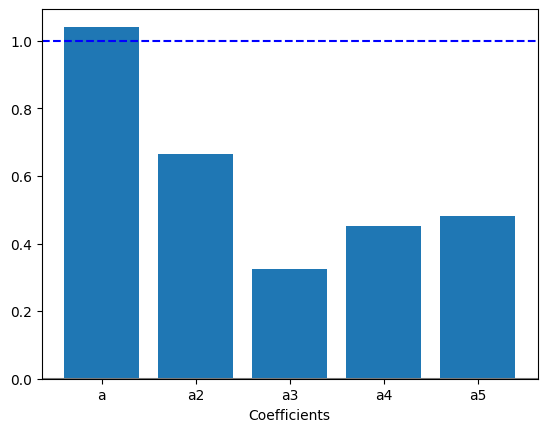

In [27]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.show();

#### LassoCV

In [28]:
## Fit a model
model = LassoCV(cv=100).fit(X_train_with_noise, y_train_with_noise)

In [29]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

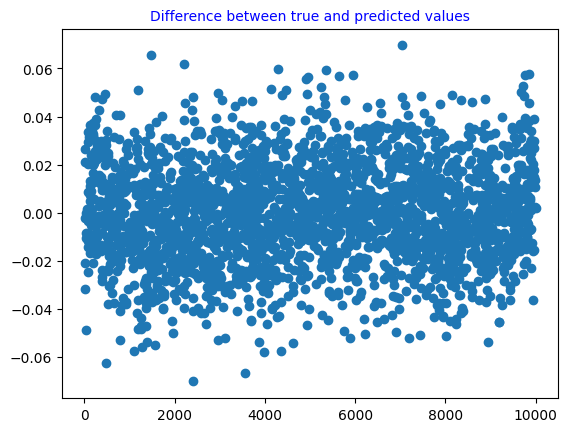

In [30]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [31]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993529165256458
Mean absolute error = 0.0164211570926158
Mean squared error = 0.0004217984846407906
Root mean squared error = 0.02053773319139166
Maximum error = 0.07010948244436227


In [32]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.14418112517735948


In [33]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.13126456 0.52591131 0.32774617 0.45493304 0.55207391]


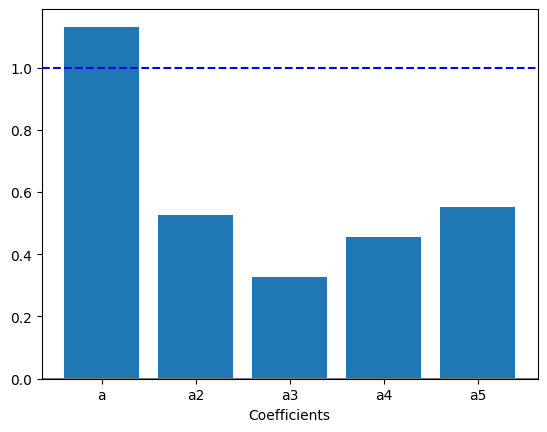

In [34]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.show();

#### ElasticNet

In [35]:
## Fit a model
model = ElasticNet(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [36]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

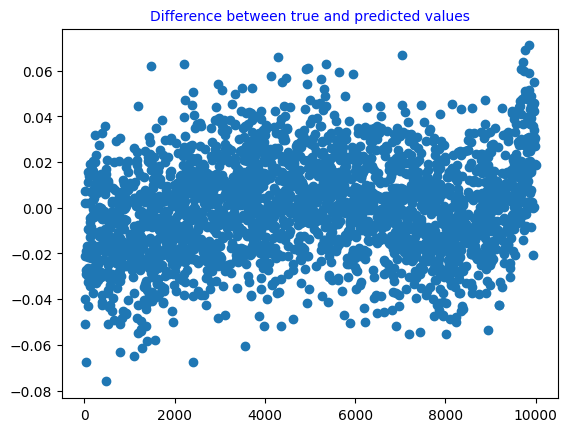

In [37]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [38]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9992758429039231
Mean absolute error = 0.017364519447643677
Mean squared error = 0.0004720385821504735
Root mean squared error = 0.021726448907966378
Maximum error = 0.07604721826387215


In [39]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.16321946091968165


In [40]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.01005056 0.63342877 0.45273906 0.42386168 0.43599266]


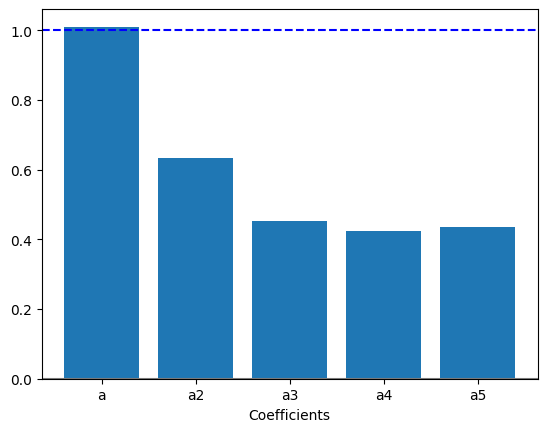

In [41]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.show();

#### Ridge

In [42]:
## Fit a model
model = Ridge(alpha=0.008).fit(X_train_with_noise, y_train_with_noise)

In [43]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

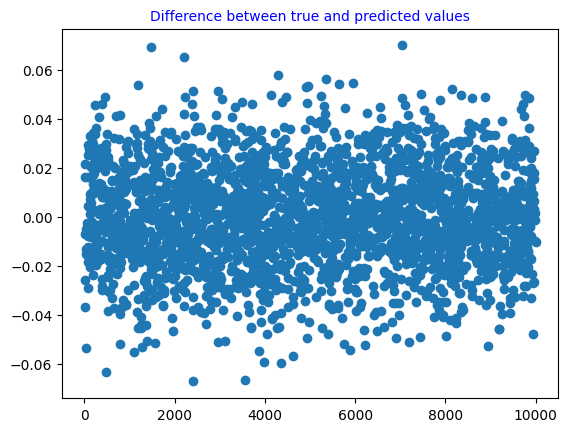

In [44]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [45]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993716587018632
Mean absolute error = 0.016171027477715563
Mean squared error = 0.0004095814804355383
Root mean squared error = 0.02023811948861698
Maximum error = 0.07003334657621396


In [46]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.14903775419465082


In [47]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.02318769 0.92100176 0.0480455  0.07691402 0.93011175]


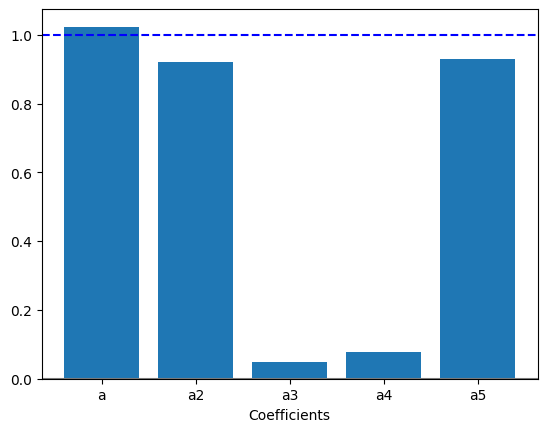

In [48]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.show();

#### BayesianRidge

In [49]:
## Fit a model
model = BayesianRidge(max_iter=1000).fit(X_train_with_noise, y_train_with_noise)

In [50]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

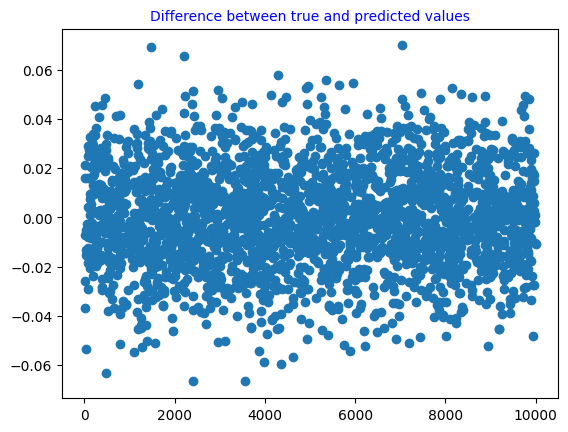

In [51]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [52]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993721539395212
Mean absolute error = 0.01616143925914365
Mean squared error = 0.00040925866197090953
Root mean squared error = 0.02023014241103877
Maximum error = 0.06996472294528067


In [53]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.14933633407385183


In [54]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.0213439   0.90056427  0.16478293 -0.10590916  1.01900372]


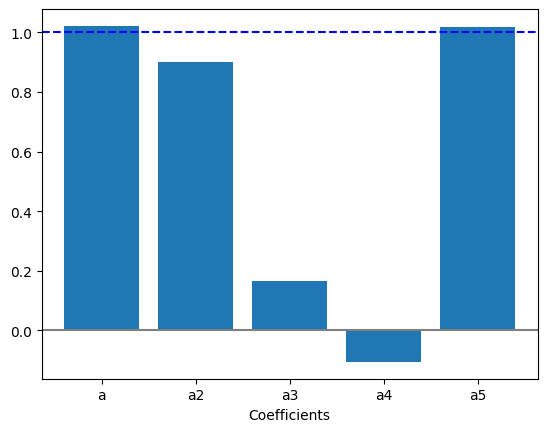

In [55]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.show();